In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from matplotlib import pyplot as plt
import os
def pearson_correlation_flux(folder1, folder2, root1, root2, condition, plot):
    """
    Calculates the Pearson correlation coefficient between experimental fluxes and simulated fluxes under different conditions.

    Args:
        folder1 (str): Directory of experimental fluxes.
        folder2 (str): Directory of simulated fluxes.
        root1 (str): Root name for the experimental flux files.
        root2 (str): Root name for the simulated flux files.
        condition (str): Initial simulation condition.
        plot (bool): Indicates whether to plot the scatter plot.

    Returns:
        tuple: Tuple containing the Pearson correlation coefficient and the p-value.
    """


    # Read experimental flux data
    exp = pd.read_csv(folder1 + root1 + condition + ".csv", sep="\t", lineterminator="\n").set_index("Reaction_ID")

        # Ruta del archivo original
    archivo_original = folder2 + root2 + condition + "_Solve_Succeeded.fluxes.csv"
    
    # Verificar si el archivo original existe
    if os.path.exists(archivo_original):
        # Si el archivo original existe, leerlo
        pheflux = pd.read_csv(archivo_original, sep="\t", lineterminator="\n", names=['Reaction_ID', "Flux"]).set_index("Reaction_ID")
    else:
        # Si el archivo original no existe, modificar el nombre del archivo y leerlo
        archivo_modificado = folder2 + root2 + condition + "_Solved_To_Acceptable_Level.fluxes.csv"
        pheflux = pd.read_csv(archivo_modificado, sep="\t", lineterminator="\n", names=['Reaction_ID', "Flux"]).set_index("Reaction_ID")

    # Create a DataFrame to store experimental and simulated fluxes
    fluxes = pd.DataFrame(columns=["Experimental", "Simulated"])

    # Iterate over each reaction in the experimental flux data
    for reaction in exp.index:
        # Skip reactions related to growth rate
        if "Growth_rate" in reaction:
            continue
        # Add experimental and simulated flux values to the DataFrame
        fluxes.loc[reaction] = [exp.loc[reaction].Flux, pheflux.loc["R_" + reaction].Flux]

    # Calculate the Pearson correlation coefficient and p-value
    corr, pvalue = pearsonr(fluxes["Experimental"], fluxes["Simulated"])
    print(condition, corr)

    if plot:
        # Create a scatter plot of experimental versus simulated fluxes
        plt.scatter(fluxes["Experimental"], fluxes["Simulated"], color="crimson")
        plt.title(f"Pearson Correlation Coefficient in condition {condition}")
        plt.xlabel("Experimental")
        plt.ylabel("Simulated")
        plt.show()

    return (corr, pvalue)


succ+glcL 0.6388515057289588


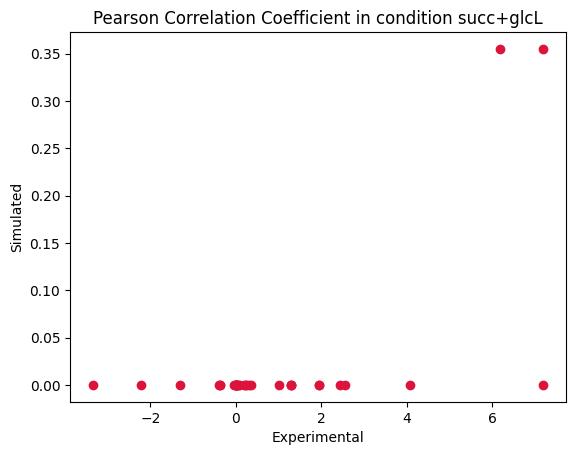

Pheflux_TIC
Condition: succ+glcL
Pearson Correlation Coefficient: 0.6388515057289588
p-value: 2.750167494912461e-05



In [8]:
df1 = "../data/experimental/"
df2 = "../results_pheflux/exp1/"
df3 = "../results_pheflux-TIC/exp1/"

root1 = "Bsubtilis_Fluxfile_" 
root2 = "Bsubtilis_"
root3 = "Bsubtilis_"
   
conditions = [ "succ+glcL"]
results_bs_p = []  # Lista para almacenar los resultados

for condition in conditions:
    result = pearson_correlation_flux(df1, df2, root1, root2, condition, plot=True)
    results_bs_p.append(result)
print("Pheflux_TIC")
# Imprimir los resultados
for i, condition in enumerate(conditions):
    print(f"Condition: {condition}")
    print(f"Pearson Correlation Coefficient: {results_bs_p[i][0]}")
    print(f"p-value: {results_bs_p[i][1]}")
    print()